# Machine Learning Milestone 2 {Classification}

### BY: Habiba Adel (52-7029)

# Appendix

1. **Import Packages**
   - Load necessary libraries and packages for data analysis and machine learning algos.

2. **Functions**
   - **Data Cleaning Steps**
     - **Cleaning Columns**: Standardize and format column data.
     - **Inconsistent Data**:
       - Lowercase text values.
       - Remove non-numeric characters and symbols.
       - Scale numeric datasets.
       - Replace specific values as needed.
     - **Duplicates**:
       - Identify and remove duplicate rows.
       - Identify and remove duplicate columns.
     - **Missing Data**:
       - Handle missing words (Missing, None, NA) appropriately.
       - Drop irrelevant rows/columns.
       - Fill missing values using mean, median, or mode.
       - Implement multivariate imputation strategies.
     - **Outliers**:
       - Replace outliers with the median.
       - Replace outliers using quantile thresholds.
   - **Feature Engineering**
     - **Encoding**:
       - Label encoding for categorical variables.
       - One-hot frequency encoding with percentage calculations.
   - **Machine Learning Helping functions**

4. **Import Dataset**
   - Load the training dataset.

5. **Exploratory Data Analysis (EDA)**
   - Conduct initial analysis to uncover insights and trends.
   - Missing values and outliers illustrations.

6. **Visualize Data**
   - Generate visualizations to illustrate key findings.
   - Outliers visualization.

7. **Machine Learning**
   - KNN
   - Logistic Regression
   - Decision Trees
   - Random Forest
   - Neural Networks
  
8. **Conclusion**
   - Summarize the results and insights from the analysis, percentage, and which classification algorithm best suits this dataset.

9. **Testing and cross validation**

# Import pkgs

In [478]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing

#Machine Learning classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


# FUNCTIONS

## General

In [106]:
def unique(df,cols):
    for col in cols:
        print(col)
        print(df[col].unique())

## Data Cleaning Steps 

### Cleaning Column Names

In [109]:
def clean_column_names(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df

In [110]:
def clean_column_name(df,col,col_name):
    df = df.rename(columns={col: col_name})
    return df

### Inconsistent Data

In [112]:
def lowercasing_columnValues (df, cols):
    for col in cols:
        df[col] = df[col].str.lower().str.strip()
    return df

In [113]:
def remove_str(df, col):
    original_value = df[col].iloc[0]
    df[col] = df[col].astype(str).str.strip().str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan)
    df[col] = df[col].astype(float)
    cleaned_value = df[col].iloc[0]
    return df

In [114]:
def replace_signs(df, col, sign_removed, sign_toBeReplaced):
    df[col] = df[col].astype(str).str.strip().str.replace(sign_removed, sign_toBeReplaced)
    return df

In [115]:
def remove_special_characters(df, col):
    original_value = df[col].value[5]
    df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)
    cleaned_value = df[col].value[5]
    return df

### Duplicates

In [117]:
def remove_duplicate_rows (df, unique_col):
    duplicates = df[df.duplicated(subset=[unique_col], keep=False)]
    if not duplicates.empty:
        combined = duplicates.groupby(unique_col).apply(lambda group: group.ffill().bfill().iloc[0])
        df_no_duplicates = df.drop_duplicates(subset=[unique_col], keep=False)
        df = pd.concat([df_no_duplicates,combined],ignore_index=True)
        return df

In [118]:
def remove_duplicate_cols_numeric (df, col1, col2, correlation= 0.95):
    if df[col1].corr(df[col2]) >= correlation:
        df[col1] = df[col1].fillna(df[col2])
        df.drop(columns=[col2], inplace=True)
    return df

In [119]:
def remove_duplicate_cols_categorical (df, col1, col2):
    if df[col1].equals(df[col2]):
        df.drop(columns=[col2], inplace=True)
    return df

### Missing Data

In [121]:
def missing_NaN (df,col, words):
    for word in words:
        df[col] = df[col].str.replace(word, np.nan)
    return df

In [122]:
def identify_missing (df):
    for col in df.columns: 
        missing_perc= df[col].isnull().sum()/len(df) *100
        if missing_perc > 0.0:
            print(col)
            print (missing_perc)

In [123]:
def drop_col (df,col):
    df.dropna(axis='columns',how='all')
    df.drop(col)
    return df

In [124]:
def fillna_with(df, col, is_mean, is_median):
    if not is_median and not is_mean:
        filling = df[col].mode()[0]  # Use mode when neither mean nor median are selected
    elif is_median and not is_mean:
        filling = df[col].median()  # Use median
    elif not is_median and is_mean:
        filling = df[col].mean()    # Use mean
    elif df[col].dtype == 'object':
        filling = df[col].mode()[0]  # Use mode for object (categorical) columns
    df[col] = df[col].fillna(value=filling)
    return df

### Outliers

In [126]:
def outliers_median (df, col):
    median = df[col].median()
    cutoff_pos = df[col].mean() + df[col].std() * 3
    cutoff_neg = df[col].mean() - df[col].std() * 3
    condition = ((df[col] > cutoff_pos) | (df[col] < cutoff_neg))
    df[col] = np.where(condition,median,df[col])
    return df

In [127]:
def outliers_quantiles(df,cols):
    for col in cols:
        if df[col].dtype in [np.int64, np.float64]: 
            floor = df[col].quantile(0.10)
            cap = df[col].quantile(0.90)
            df[col] = np.where(df[col] <floor, floor,df[col])
            df[col] = np.where(df[col] >cap,cap,df[col])
    return df

## Feature Engineering

### Encoding

Label Encoding

In [131]:
def label_encoder(df, col):
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    return df


One-hot encoding

In [133]:
def cal_top_for_xper(dataframe, variable, percent, percent_now = 0, count = 1):
    value_counts = dataframe[variable].value_counts()
    if percent_now >= percent:
        return value_counts.head(count).index
    else:
        cum_frequency = value_counts.head(count).cumsum().iloc[-1]
        percent_now = (cum_frequency / len(dataframe)) * 100
        return cal_top_for_xper(dataframe, variable, percent, percent_now, count + 1)


In [134]:
def one_hot_freq_encode(df, variable, percent):
    top_x = cal_top_for_xper(df,variable,percent,percent_now =0, count=1)
    for label in top_x:
        df[variable + '_' + str(label)] = np.where(
            df[variable] == label, 1, 0) 
    df = df.drop(variable, axis=1, inplace=True)
    return df

## Machine Learning Helping Functions

In [344]:
# Convert predictions to DataFrame
def pred_df(predicted, x, y):
    y_pred_df = pd.DataFrame(predicted, 
                          index=x.index, 
                          columns=y.columns)
    return y_pred_df


In [436]:
def plot_decision_tree (model, target):
    plt.figure(figsize=(12, 8), dpi=150)
    if (target == 'ADHD_Outcome'):
        plot_tree(
            model.estimators_[0],
            filled=True,
            feature_names=X.columns
        )
        plt.title("Decision Tree for Target: ADHD_Outcome")
    else:
        plot_tree(
            model.estimators_[1],
            filled=True,
            feature_names=X.columns
        )
        plt.title("Decision Tree for Target: Sex_F")
    plt.show()

# IMPORT

In [136]:
categorical_df = pd.read_excel('TRAIN_CATEGORICAL_METADATA_new.xlsx')
numerical_df = pd.read_excel('TRAIN_QUANTITATIVE_METADATA_new.xlsx')
matrices_df = pd.read_csv('TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
solutions_df = pd.read_excel('TRAINING_SOLUTIONS.xlsx')

In [137]:
matrices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


# EDA

### Category Dataframe

In [140]:
unique(categorical_df,categorical_df.columns)

participant_id
['00aIpNTbG5uh' '00fV0OyyoLfw' '04X1eiS79T4B' ... 'zWzLCi3NTBTd'
 'Zy9GTHDxUbXU' 'Zye7yYRQohXi']
Basic_Demos_Enroll_Year
[2019 2017 2018 2016 2015 2020]
Basic_Demos_Study_Site
[4 1 2 3]
PreInt_Demos_Fam_Child_Ethnicity
[ 1.  0.  3.  2. nan]
PreInt_Demos_Fam_Child_Race
[ 0.  9.  2.  8.  1. 10.  4. nan  3. 11.  7.]
MRI_Track_Scan_Location
[ 3.  2.  1.  4. nan]
Barratt_Barratt_P1_Edu
[21.  9. 18. 12. 15.  3. nan  6.]
Barratt_Barratt_P1_Occ
[45.  0. 10. 25. 35. nan 30. 40. 15.  5. 20.]
Barratt_Barratt_P2_Edu
[nan 21. 18. 15.  9. 12.  6.  3.]
Barratt_Barratt_P2_Occ
[nan 45.  0. 40. 30. 15. 35.  5. 10. 20. 25.]


In [141]:
categorical_df = clean_column_name(categorical_df,'Basic_Demos_Enroll_Year','year')

In [142]:
categorical_df = clean_column_name(categorical_df,'Basic_Demos_Study_Site','site')

In [143]:
categorical_df = clean_column_name(categorical_df,'PreInt_Demos_Fam_Child_Ethnicity','ethnicity')

In [144]:
categorical_df = clean_column_name(categorical_df,'MRI_Track_Scan_Location','scan_loc')

In [145]:
categorical_df = clean_column_name(categorical_df,'PreInt_Demos_Fam_Child_Race','race');

In [146]:
categorical_df = clean_column_name(categorical_df,'Barratt_Barratt_P1_Edu','p1_edu');

In [147]:
categorical_df = clean_column_name(categorical_df,'Barratt_Barratt_P1_Occ','p1_occ');

In [148]:
categorical_df = clean_column_name(categorical_df,'Barratt_Barratt_P2_Edu','p2_edu');

In [149]:
categorical_df = clean_column_name(categorical_df,'Barratt_Barratt_P2_Occ','p2_occ')

In [150]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  1213 non-null   object 
 1   year            1213 non-null   int64  
 2   site            1213 non-null   int64  
 3   ethnicity       1170 non-null   float64
 4   race            1159 non-null   float64
 5   scan_loc        1210 non-null   float64
 6   p1_edu          1198 non-null   float64
 7   p1_occ          1182 non-null   float64
 8   p2_edu          1015 non-null   float64
 9   p2_occ          991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [151]:
identify_missing(categorical_df)

ethnicity
3.544929925803792
race
4.451772464962902
scan_loc
0.24732069249793898
p1_edu
1.2366034624896949
p1_occ
2.555647155812036
p2_edu
16.323165704863975
p2_occ
18.301731244847485


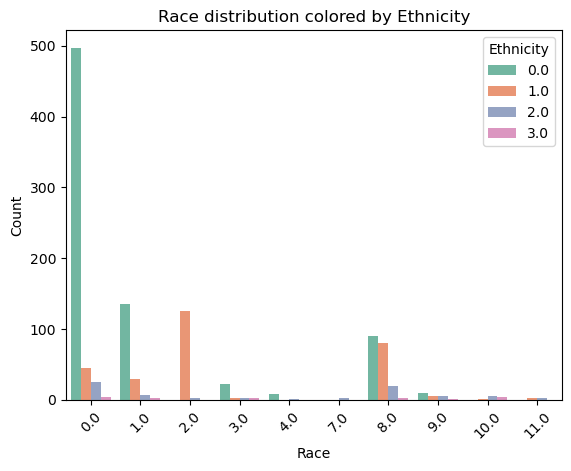

In [152]:
plt.figure()
sns.countplot(data=categorical_df, x='race', hue='ethnicity', palette='Set2')
plt.title('Race distribution colored by Ethnicity')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Ethnicity')
plt.xticks(rotation=45)
plt.show()
# Most 0 ethnicity is 0/1 race -- 2 race is 1 ethnicity
# However it is just better to fill it with unkown and see if there is a peak 

In [153]:
categorical_df['ethnicity'] = categorical_df['ethnicity'].fillna(3)
categorical_df['race'] = categorical_df['race'].fillna(10)

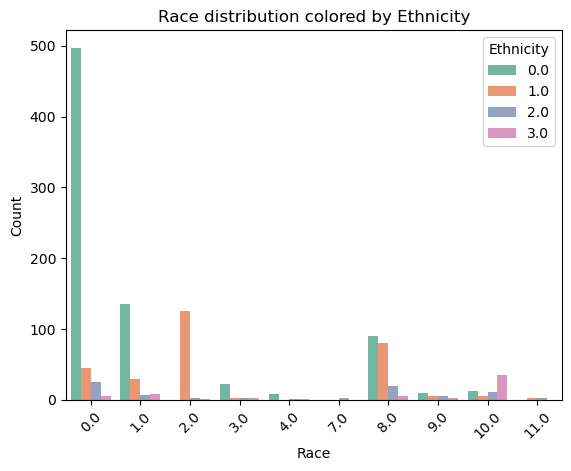

In [154]:
plt.figure()
sns.countplot(data=categorical_df, x='race', hue='ethnicity', palette='Set2')
plt.title('Race distribution colored by Ethnicity')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Ethnicity')
plt.xticks(rotation=45)
plt.show()
# Race 10 mostly increased in ethnicity 3 which makes sense

In [155]:
categorical_df.groupby('site')['scan_loc'].apply(lambda x: x.isnull().sum())

site
1    3
2    0
3    0
4    0
Name: scan_loc, dtype: int64

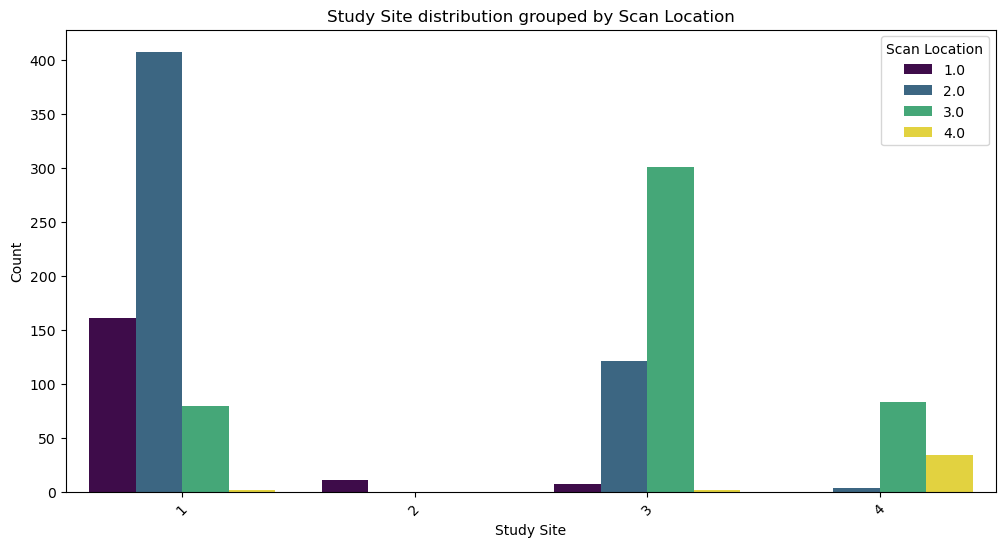

In [156]:
plt.figure(figsize=(12,6))
sns.countplot(data=categorical_df, x='site', hue='scan_loc', palette='viridis')
plt.title('Study Site distribution grouped by Scan Location')
plt.xlabel('Study Site')
plt.ylabel('Count')
plt.legend(title='Scan Location')
plt.xticks(rotation=45)
plt.show()

In [157]:
categorical_df['scan_loc'] = categorical_df['scan_loc'].fillna(2)

In [158]:
categorical_df[['p1_edu', 'p2_edu', 'p1_occ', 'p2_occ']].corr()
#no high correlation between the first and second parent

,p1_edu,p2_edu,p1_occ,p2_occ
p1_edu,1.000000,0.366556,0.391740,0.272463
p2_edu,0.366556,1.000000,0.093194,0.556524
p1_occ,0.391740,0.093194,1.000000,0.054059
p2_occ,0.272463,0.556524,0.054059,1.000000


In [159]:
categorical_df = fillna_with(categorical_df, 'p1_edu', False, False);
categorical_df = fillna_with(categorical_df, 'p2_edu', False, False);
categorical_df = fillna_with(categorical_df, 'p1_occ', False, False);
categorical_df = fillna_with(categorical_df, 'p2_occ', False, False)

In [160]:
identify_missing(categorical_df) #no missing now lets encode more

In [161]:
label_encoder(categorical_df, 'year');
label_encoder(categorical_df, 'p1_edu');
label_encoder(categorical_df, 'p2_edu');
label_encoder(categorical_df, 'p1_occ');
label_encoder(categorical_df, 'p2_occ');

In [162]:
one_hot_freq_encode(categorical_df, 'site', 100);
one_hot_freq_encode(categorical_df, 'race', 100);
one_hot_freq_encode(categorical_df, 'ethnicity', 100);
one_hot_freq_encode(categorical_df, 'scan_loc', 100)

In [163]:
unique(categorical_df,categorical_df.columns)

participant_id
['00aIpNTbG5uh' '00fV0OyyoLfw' '04X1eiS79T4B' ... 'zWzLCi3NTBTd'
 'Zy9GTHDxUbXU' 'Zye7yYRQohXi']
year
[4 2 3 1 0 5]
p1_edu
[6 2 5 3 4 0 1]
p1_occ
[9 0 2 5 7 6 8 3 1 4]
p2_edu
[6 5 4 2 3 1 0]
p2_occ
[9 0 8 6 3 7 1 2 4 5]
site_1
[0 1]
site_3
[0 1]
site_4
[1 0]
site_2
[0 1]
race_0.0
[1 0]
race_8.0
[0 1]
race_1.0
[0 1]
race_2.0
[0 1]
race_10.0
[0 1]
race_3.0
[0 1]
race_9.0
[0 1]
race_4.0
[0 1]
race_11.0
[0 1]
race_7.0
[0 1]
ethnicity_0.0
[0 1]
ethnicity_1.0
[1 0]
ethnicity_2.0
[0 1]
ethnicity_3.0
[0 1]
scan_loc_2.0
[0 1]
scan_loc_3.0
[1 0]
scan_loc_1.0
[0 1]
scan_loc_4.0
[0 1]


### Numerical Dataframe

In [165]:
numerical_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [166]:
numerical_df.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1200.000000,1190.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,853.000000
mean,59.514750,13.419328,3.819317,13.337219,39.767694,17.963364,16.557036,25.498751,2.074751,12.213455,2.324751,7.613787,4.103821,5.539037,4.599668,2.274917,7.740864,11.245678
std,49.744631,2.112830,1.330348,3.593562,4.872729,3.333965,5.146548,3.053720,2.022992,6.517330,2.166399,4.130399,2.808079,2.807063,3.510469,2.089041,2.094832,3.234372
min,-100.000000,0.000000,2.000000,5.000000,23.000000,7.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,77.800000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [167]:
#numerical_df = outliers_quantiles(numerical_df,numerical_df.columns)

In [168]:
numerical_df = fillna_with(numerical_df, ['EHQ_EHQ_Total','ColorVision_CV_Score','APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 
    'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP','SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 
    'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 
    'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 
    'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial'], True, False) #fill missing with mean

In [169]:
numerical_df = fillna_with(numerical_df, ['MRI_Track_Age_at_Scan'], False, True) #fill missing with median

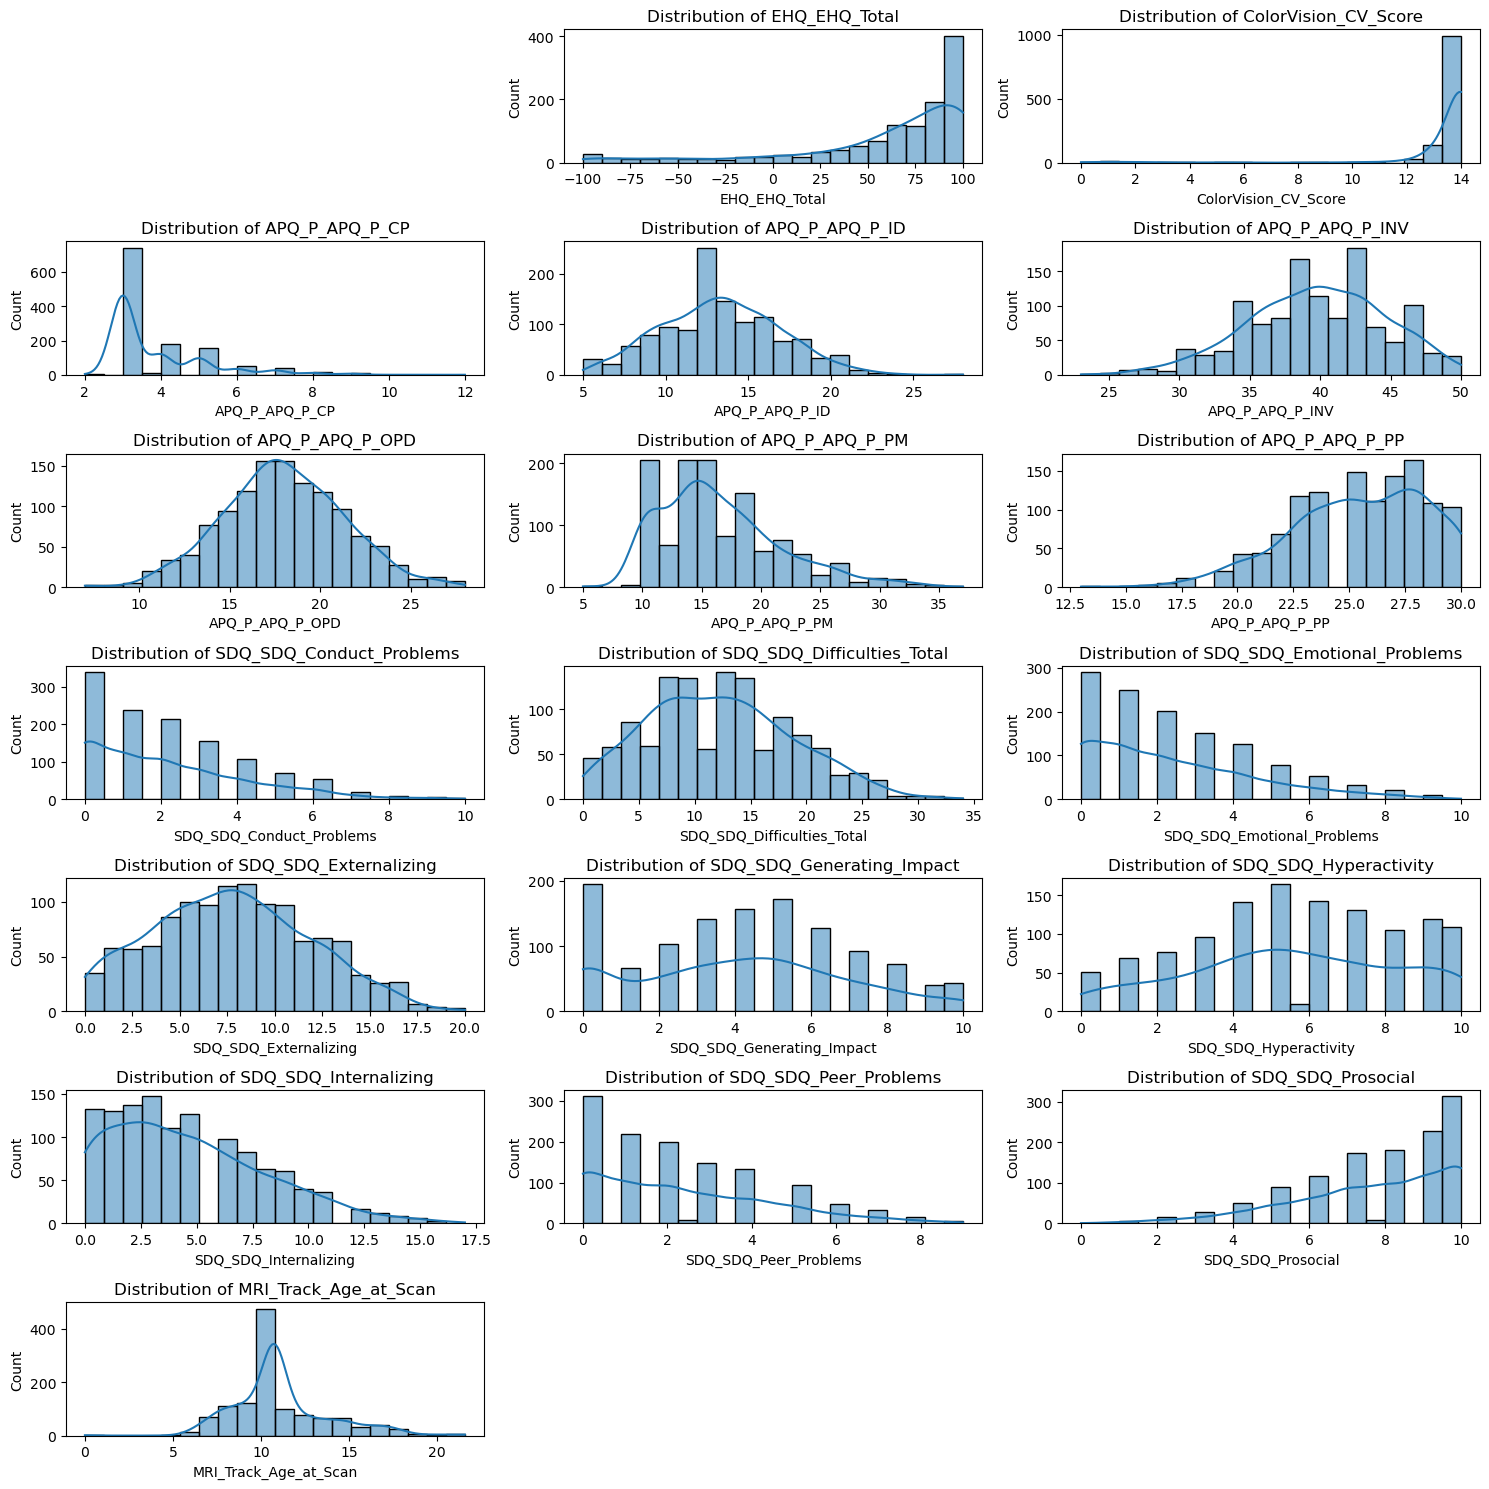

In [170]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_df.columns):
    if column == 'participant_id':
        continue
    plt.subplot(len(numerical_df.columns) // 3 + 1, 3, i + 1)  
    
    # Plot the distribution (you can use histplot or distplot)
    sns.histplot(numerical_df[column], kde=True, bins=20)
    
    # Set the title for each plot
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


## Final Dataset

In [172]:
combined_df = categorical_df.merge(numerical_df, on='participant_id').merge(matrices_df, on='participant_id').merge(solutions_df, on= 'participant_id') ;

In [173]:
combined_df['adhd_Sex'] = (combined_df['ADHD_Outcome']*2) + combined_df['Sex_F']

In [174]:
combined_df['adhd_Sex'].unique()

array([2, 1, 3, 0], dtype=int64)

In [230]:
combined_df.to_csv('combined_train_wids.csv', index=False) #change here for the test dataset

# Machine Learning

In [486]:
main_processed_df = pd.read_csv('combined_train_wids.csv')

#### Lets Have a look at the labels in the dataset {Imbalance?}

In [488]:
count_sex_0, count_sex_1 = main_processed_df.Sex_F.value_counts()
print(count_sex_0, count_sex_1)

797 416


In [490]:
count_adhd_0, count_adhd_1 = main_processed_df.ADHD_Outcome.value_counts()
print(count_adhd_0, count_adhd_1)

831 382


In [533]:
# Count of ADHD = 0 given Sex_F = 0 (e.g., male)
adhd_0_sex_0 = main_processed_df[(main_processed_df['Sex_F'] == 0) & (main_processed_df['ADHD_Outcome'] == 0)].shape[0]

# Count of ADHD = 0 given Sex_F = 1 (e.g., female)
adhd_0_sex_1 = main_processed_df[(main_processed_df['Sex_F'] == 1) & (main_processed_df['ADHD_Outcome'] == 0)].shape[0]

# Count of Sex_F = 0 given ADHD = 1 
adhd_1_sex_0 = main_processed_df[(main_processed_df['Sex_F'] == 0) & (main_processed_df['ADHD_Outcome'] == 1)].shape[0]

# Count of Sex_F = 1 given ADHD = 1 
adhd_1_sex_1 = main_processed_df[(main_processed_df['Sex_F'] == 1) & (main_processed_df['ADHD_Outcome'] == 1)].shape[0]

print("ADHD=0 given Sex_F=0:", adhd_0_sex_0)
print("ADHD=0 given Sex_F=1:", adhd_0_sex_1)
print("ADHD=1 given Sex_F=0:", adhd_1_sex_0)
print("ADHD=1 given Sex_F=1:", adhd_1_sex_1)

ADHD=0 given Sex_F=0: 216
ADHD=0 given Sex_F=1: 166
ADHD=1 given Sex_F=0: 581
ADHD=1 given Sex_F=1: 250


Conclusion: 
- ADHD is more frequent in males
- Sex_F is less frequent overall

In [563]:
df_01 = main_processed_df[(main_processed_df['Sex_F'] == 1) & (main_processed_df['ADHD_Outcome'] == 0)]
df_00 = main_processed_df[(main_processed_df['Sex_F'] == 0) & (main_processed_df['ADHD_Outcome'] == 0)]
df_10 = main_processed_df[(main_processed_df['Sex_F'] == 0) & (main_processed_df['ADHD_Outcome'] == 1)]
df_11 = main_processed_df[(main_processed_df['Sex_F'] == 1) & (main_processed_df['ADHD_Outcome'] == 1)]

df_01_over = df_01.sample(df_11.shape[0], replace=True)
df_00_over = df_00.sample(df_11.shape[0], replace=True)
df = pd.concat([df_00_over, df_01_over, df_10, df_11], axis = 0)
df = df.sample(frac=1).reset_index(drop=True)

In [565]:
#df_adhd_0 = df_sex_over[main_processed_df['ADHD_Outcome'] == 0]
#df_adhd_1 = df_sex_over[main_processed_df['ADHD_Outcome'] == 1]

#df_sex_1_over = df_sex_1.sample(count_sex_0, replace=True)
#df_sex_over = pd.concat([df_sex_0, df_sex_1_over], axis = 0)

In [566]:
processed_df = df#The final df ready for splitting

#### Splitting the dataset

In [568]:
X = processed_df.drop(['ADHD_Outcome', 'Sex_F', 'adhd_Sex'], axis=1)  # Features
X.set_index('participant_id', inplace=True)

y1 = processed_df['adhd_Sex'] # One target variables
y2 = processed_df[['ADHD_Outcome', 'Sex_F']] # Two target variables

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42, stratify=y1)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42, stratify=y2) #This is the main split

In [569]:
scaler = StandardScaler()

scaled_X1_train = scaler.fit_transform(X1_train)
scaled_X1_test = scaler.fit_transform(X1_test)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## KNN

- Better numbers when independent
- Better numbers when not scaled?

In [341]:
knn = KNeighborsClassifier(n_neighbors=5)
multi_target_knn = MultiOutputClassifier(knn)

#predicting both targets as one variable
knn.fit(scaled_X1_train, y1_train)
y1_pred = knn.predict(scaled_X1_test)

# Predicting both target variables
multi_target_knn.fit(scaled_X_train, y_train)
y_pred_knn = multi_target_knn.predict(scaled_X_test)

In [346]:
y_pred_df = pred_df(y_pred_knn,X_test,y_test)

In [348]:
print(classification_report(y1_test,y1_pred)) 

              precision    recall  f1-score   support

           0       0.20      0.44      0.28        70
           1       0.17      0.23      0.20        52
           2       0.48      0.36      0.41       170
           3       0.67      0.08      0.15        72

    accuracy                           0.30       364
   macro avg       0.38      0.28      0.26       364
weighted avg       0.42      0.30      0.30       364



In [349]:
print(classification_report(y_test.iloc[:,0],y_pred_df.iloc[:,0])) #ADHD_Outcome

              precision    recall  f1-score   support

           0       0.32      0.50      0.39       122
           1       0.65      0.46      0.54       242

    accuracy                           0.48       364
   macro avg       0.48      0.48      0.46       364
weighted avg       0.54      0.48      0.49       364



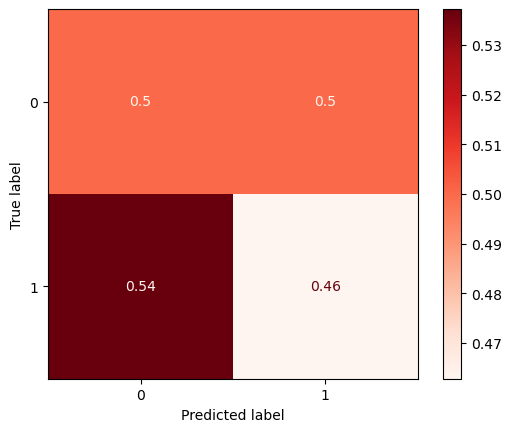

In [442]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,0], y_pred_df.iloc[:,0], normalize='true')).plot(cmap=plt.cm.Reds)

In [350]:
print(classification_report(y_test.iloc[:,1],y_pred_df.iloc[:,1])) #gender

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       240
           1       0.53      0.27      0.36       124

    accuracy                           0.67       364
   macro avg       0.62      0.57      0.57       364
weighted avg       0.64      0.67      0.64       364



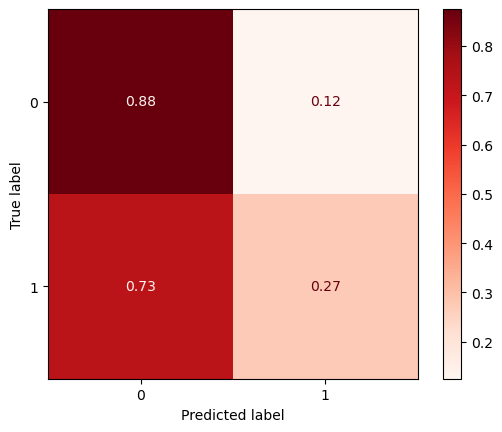

In [438]:
cm1 = confusion_matrix(y_test.iloc[:,1], y_pred_df.iloc[:,1], normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm1).plot(cmap=plt.cm.Reds)

## Logistic Regression

In [570]:
log_reg = LogisticRegression()
multi_target_log_reg = MultiOutputClassifier(log_reg)
multi_target_log_reg.fit(scaled_X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [571]:
y_pred_log_reg = multi_target_log_reg.predict(scaled_X_test)

In [572]:
y_pred_log_reg_df = pred_df(y_pred_log_reg,X_test,y_test)

In [573]:
print(classification_report(y_test.iloc[:,0],y_pred_log_reg_df.iloc[:,0])) #ADHD_Outcome

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       150
           1       0.82      0.85      0.84       250

    accuracy                           0.79       400
   macro avg       0.78      0.77      0.78       400
weighted avg       0.79      0.79      0.79       400



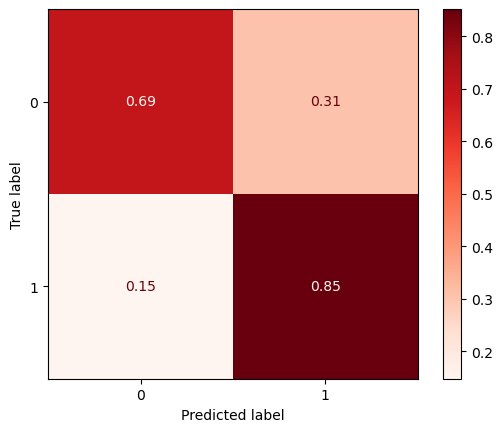

In [576]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,0], y_pred_log_reg_df.iloc[:,0], normalize='true')).plot(cmap=plt.cm.Reds)

In [577]:
print(classification_report(y_test.iloc[:,1],y_pred_log_reg_df.iloc[:,1])) #gender

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       250
           1       0.77      0.69      0.73       150

    accuracy                           0.81       400
   macro avg       0.80      0.78      0.79       400
weighted avg       0.80      0.81      0.80       400



There is an improvement compared to when we didn't oversample the 'Sex_F'

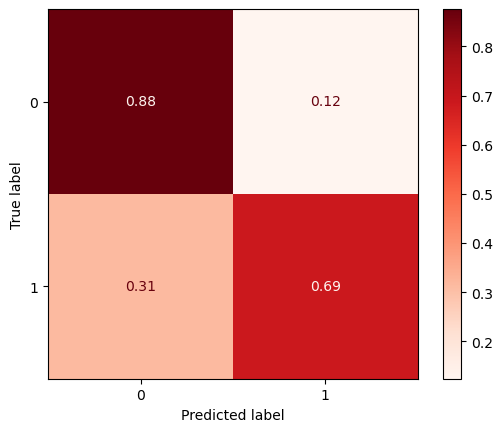

In [579]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,1], y_pred_log_reg_df.iloc[:,1], normalize='true')).plot(cmap=plt.cm.Reds)

## Decision Trees

In [381]:
decisionTrees = DecisionTreeClassifier()

In [383]:
multi_target_decisionTrees = MultiOutputClassifier(decisionTrees)
multi_target_decisionTrees.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [384]:
pred_decisionTrees = multi_target_decisionTrees.predict(X_test)

In [385]:
pred_decisionTrees_df = pred_df(pred_decisionTrees,X_test,y_test)

In [386]:
print(classification_report(y_test.iloc[:,0],pred_decisionTrees_df.iloc[:,0])) #ADHD_Outcome

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       122
           1       0.75      0.76      0.76       242

    accuracy                           0.68       364
   macro avg       0.63      0.63      0.63       364
weighted avg       0.67      0.68      0.67       364



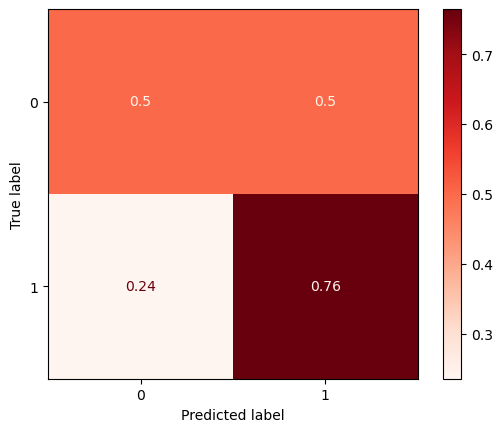

In [449]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,0], pred_decisionTrees_df.iloc[:,0], normalize='true')).plot(cmap=plt.cm.Reds)

In [387]:
print(classification_report(y_test.iloc[:,1],pred_decisionTrees_df.iloc[:,1])) #gender

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       240
           1       0.37      0.35      0.36       124

    accuracy                           0.58       364
   macro avg       0.52      0.52      0.52       364
weighted avg       0.57      0.58      0.57       364



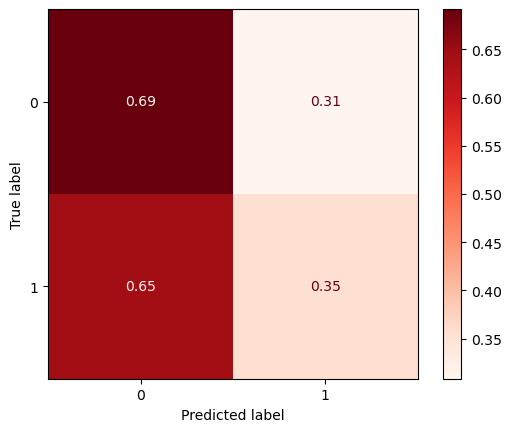

In [451]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,1], pred_decisionTrees_df.iloc[:,1], normalize='true')).plot(cmap=plt.cm.Reds)

To visulaize I will prune the tree to max_depth=3

In [410]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
prund_tree_multi_target = MultiOutputClassifier(pruned_tree)
prund_tree_multi_target.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=3))

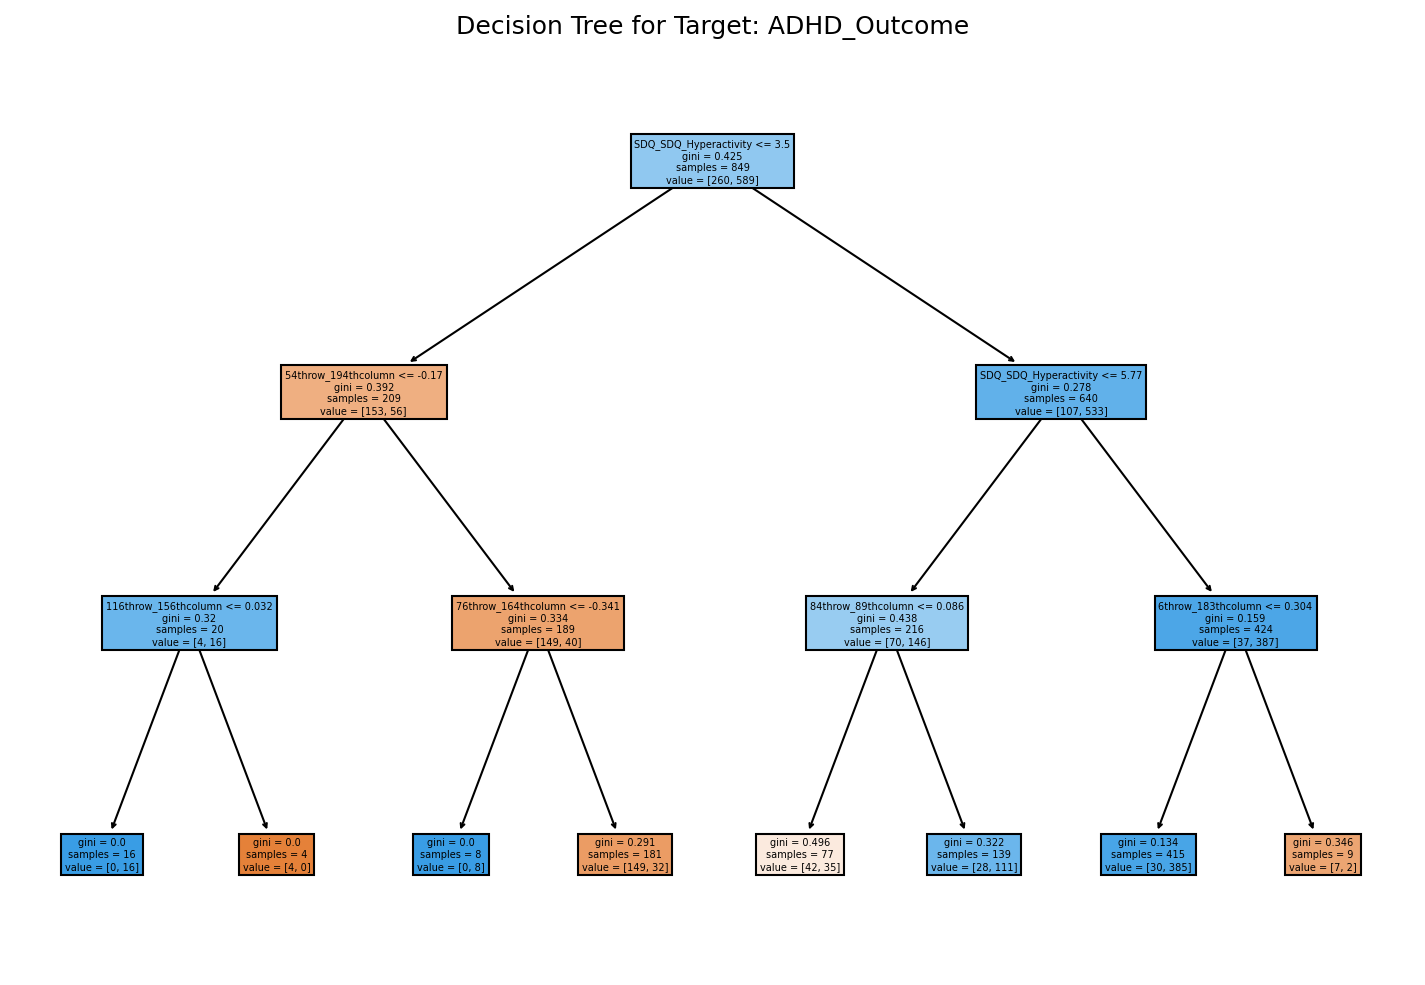

In [432]:
plot_decision_tree(prund_tree_multi_target,'ADHD_Outcome')

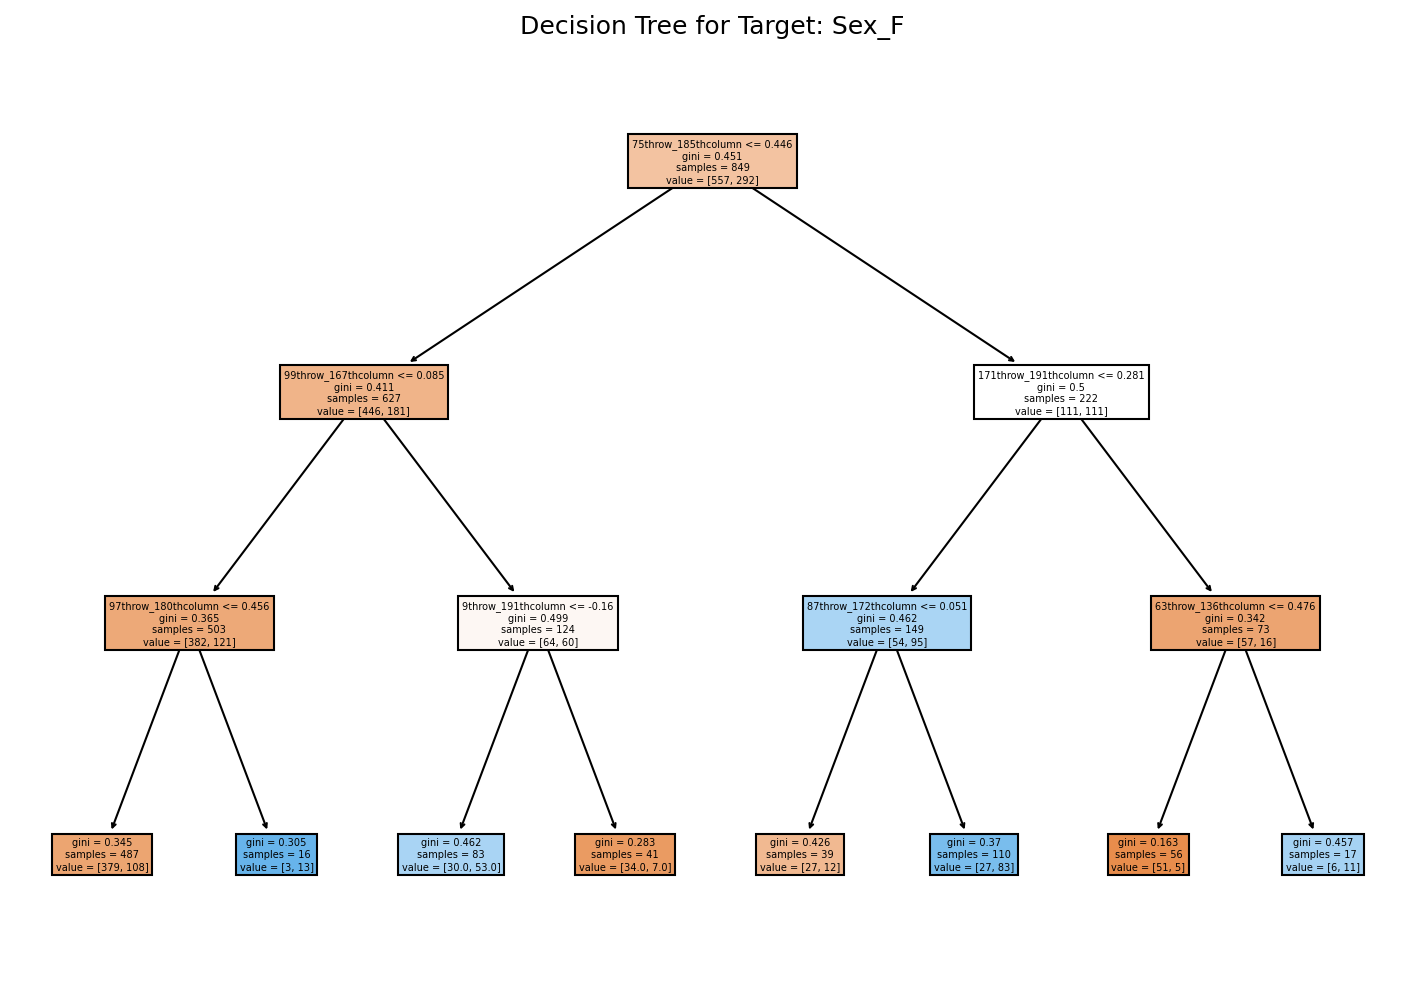

In [434]:
plot_decision_tree(prund_tree_multi_target,'Sex_F')

## Random Forest

In [365]:
randomforest = RandomForestClassifier()

In [367]:
multi_target_randomforest = MultiOutputClassifier(randomforest)
multi_target_randomforest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [369]:
pred_randomforest2 = multi_target_randomforest.predict(X_test)

In [371]:
pred_randomforest_df = pred_df(pred_randomforest,X_test,y_test)

In [372]:
print(classification_report(y_test.iloc[:,0],pred_randomforest_df.iloc[:,0])) #ADHD_Outcome

              precision    recall  f1-score   support

           0       0.67      0.07      0.12       122
           1       0.68      0.98      0.80       242

    accuracy                           0.68       364
   macro avg       0.67      0.52      0.46       364
weighted avg       0.67      0.68      0.57       364



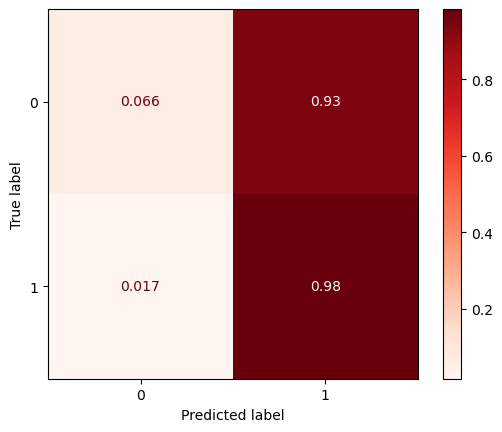

In [453]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,0], pred_randomforest_df.iloc[:,0], 
                                                         normalize='true')).plot(cmap=plt.cm.Reds)

In [373]:
print(classification_report(y_test.iloc[:,1],pred_randomforest_df.iloc[:,1])) #gender

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       240
           1       0.31      0.03      0.06       124

    accuracy                           0.65       364
   macro avg       0.48      0.50      0.42       364
weighted avg       0.54      0.65      0.54       364



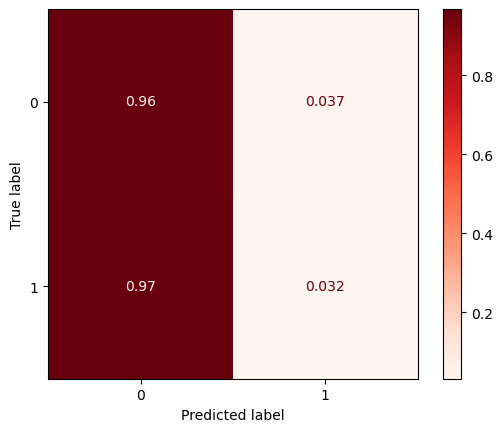

In [455]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.iloc[:,1], pred_randomforest_df.iloc[:,1], 
                                                         normalize='true')).plot(cmap=plt.cm.Reds)

#### Tuning Hyperparamters using GridSearch

In [463]:
param_grid = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [5, 10, None],
}

In [465]:
# Tuning Hyperparameters
grid_search = GridSearchCV(multi_target_randomforest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier()),
             param_grid={'estimator__max_depth': [5, 10, None],
                         'estimator__n_estimators': [50, 100]},
             scoring='accuracy')

In [467]:
pred_randforest = grid_search.predict(X_test)

In [469]:
pred_randforest_df = pred_df(pred_randforest,X_test,y_test)

In [470]:
print(classification_report(y_test.iloc[:,0],pred_randforest_df.iloc[:,0])) #ADHD_Outcome

              precision    recall  f1-score   support

           0       0.71      0.04      0.08       122
           1       0.67      0.99      0.80       242

    accuracy                           0.67       364
   macro avg       0.69      0.52      0.44       364
weighted avg       0.69      0.67      0.56       364



In [471]:
print(classification_report(y_test.iloc[:,1],pred_randforest_df.iloc[:,1])) #gender

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       240
           1       0.50      0.02      0.03       124

    accuracy                           0.66       364
   macro avg       0.58      0.50      0.41       364
weighted avg       0.61      0.66      0.53       364



In [461]:
scores = cross_val_score(multi_target_randomforest, X, y2, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.46502058 0.49794239 0.44032922 0.50826446 0.47107438]
Mean accuracy: 0.4765262048090332
